#1. Load database

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Load data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

class label for image 12131 is 9


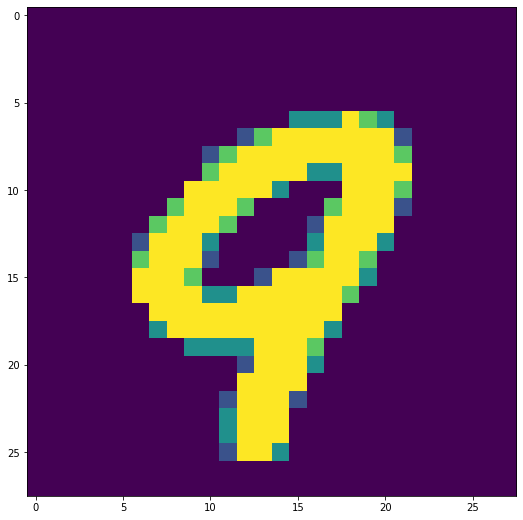

In [ ]:
import matplotlib.pylab as plt

isel = 12131
figure = plt.figure(figsize=(9,9))
plt.imshow(x_train[isel])
print('class label for image {} is {}'.format(isel,y_train[isel]))

Visualitzar primera imatge de cada classe

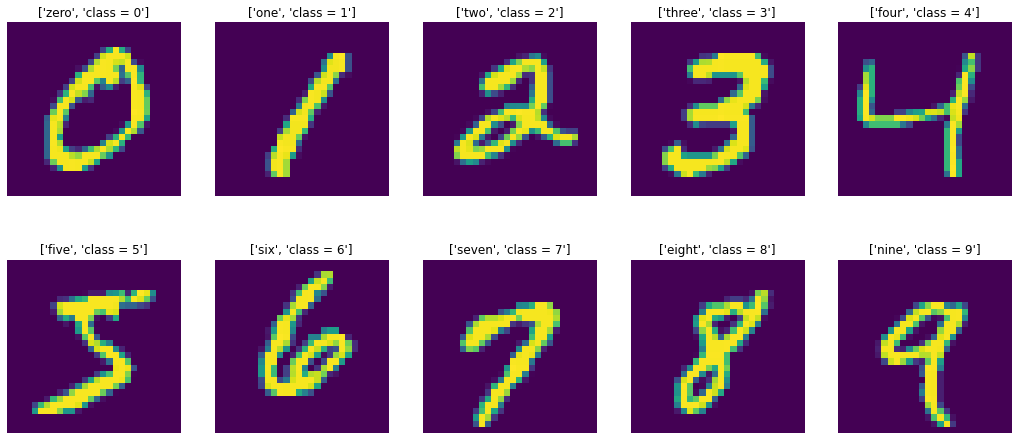

In [ ]:
import skimage as sk # load skimage libraries
from skimage import io
import matplotlib.pylab as plt

label_names = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

fig = plt.figure(figsize=(18, 8))

for kclass in range(0,10):
    ind = np.argwhere(y_train==kclass)
    ax = fig.add_subplot(2, 5, kclass+1)
    ax.imshow(x_train[ind[0][0]].squeeze())
    ax.set_title([label_names[kclass], 'class = {}'.format(kclass)])
    ax.axis('off')

# 2. Preprocess data

Normalitzar imatges 

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Convertir etiquetes de classe a variables categòriques (one-hot)

In [ ]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# convert class vectors to binary class matrices
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# 3. Buid and train DL model

Define the DL architecture

In [ ]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(name="features"),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 features (Flatten)          (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
batch_size =256
epochs = 5

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train_cat, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#model.save(folder_data + '/model_saved') # save trained model

Epoch 1/5
211/211 [==============================] - 40s 185ms/step - loss: 0.5249 - accuracy: 0.8401 - val_loss: 0.1161 - val_accuracy: 0.9695
Epoch 2/5
211/211 [==============================] - 41s 197ms/step - loss: 0.1479 - accuracy: 0.9546 - val_loss: 0.0738 - val_accuracy: 0.9793
Epoch 3/5
211/211 [==============================] - 39s 185ms/step - loss: 0.1055 - accuracy: 0.9679 - val_loss: 0.0629 - val_accuracy: 0.9833
Epoch 4/5
211/211 [==============================] - 39s 185ms/step - loss: 0.0872 - accuracy: 0.9729 - val_loss: 0.0539 - val_accuracy: 0.9858
Epoch 5/5
211/211 [==============================] - 39s 187ms/step - loss: 0.0760 - accuracy: 0.9768 - val_loss: 0.0458 - val_accuracy: 0.9880


#4. Avaluar el classificador amb les dades de test

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

score = model.evaluate(x_test, y_test_cat, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

y_test_pred_DL_full = np.argmax(model.predict(x_test),axis=1) # convert back from one-hot categorical encoding to integers
print(classification_report(y_test, y_test_pred_DL_full, target_names=label_names))
print(confusion_matrix(y_test, y_test_pred_DL_full))

Test loss: 0.04487353935837746
Test accuracy: 0.9851999878883362
              precision    recall  f1-score   support

        zero       0.98      0.99      0.99       980
         one       0.99      1.00      0.99      1135
         two       0.98      0.99      0.99      1032
       three       0.99      0.99      0.99      1010
        four       0.99      0.99      0.99       982
        five       0.97      0.99      0.98       892
         six       1.00      0.97      0.99       958
       seven       0.98      0.98      0.98      1028
       eight       0.99      0.98      0.98       974
        nine       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 975    0    1    0    0    1    1    1    1    0]
 [   0 1131    1    1    0    0    1    1    0    0]
 [   1    3 1019    1    1    0    0    5    2    0]
 [   0    0    3 

Inspeccionem els missclassification


treu label for image (array([9634]),) is [0]
predicted label for image (array([9634]),) is [2]


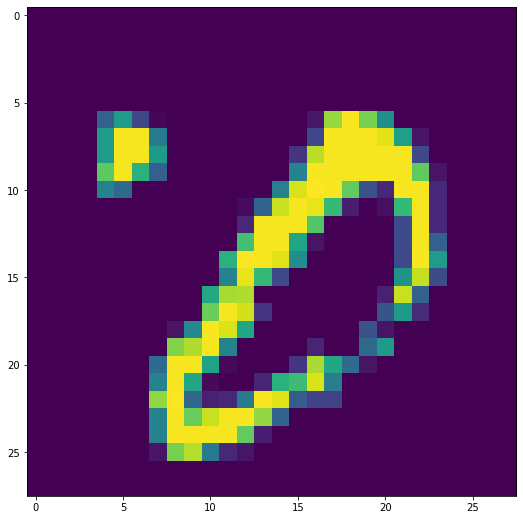

In [ ]:
isel = np.where((y_test==0)&(y_test_pred_DL_full==2))

figure = plt.figure(figsize=(9,9))
plt.imshow(np.squeeze(x_test[isel]))
print('true label for image {} is {}'.format(isel,y_test[isel]))
print('predicted label for image {} is {}'.format(isel,y_test_pred_DL_full[isel]))

mirem 7's que semblen 2's:

In [ ]:
isel = np.where((y_test==7)&(y_test_pred_DL_full==2))
np.shape(isel)
isel = np.squeeze(isel)

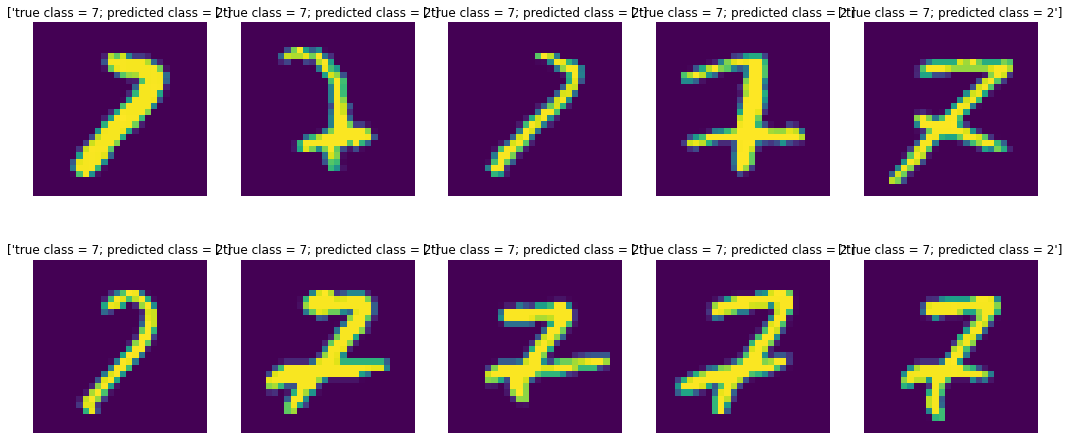

In [ ]:
fig = plt.figure(figsize=(18, 8))

cnt = 0
for k in isel:
    cnt += 1
    ax = fig.add_subplot(2, 5,cnt)
    ax.imshow(np.squeeze(x_test[k]))
    ax.set_title(['true class = {}; predicted class = {}'.format(y_test[k],y_test_pred_DL_full[k])])
    ax.axis('off')